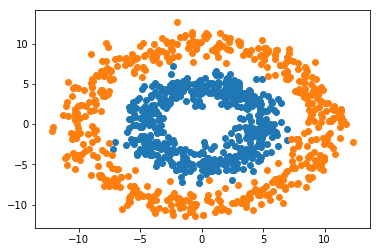

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N=1000
D=2

R_inner=5.0
R_outer=10.0

R1=np.random.randn(int(N/2))+R_inner          #spread aroung 5
theta=2*np.pi*np.random.random(int(N/2))
#X_inner=np.concatenate([R1*np.cos(theta),R1*np.sin(theta)]).reshape(500,2) #same as below
X_inner=np.concatenate([[R1*np.cos(theta)],[R1*np.sin(theta)]]).T

R2=np.random.randn(int(N/2))+R_outer
theta=2*np.pi*np.random.random(int(N/2))
X_outer=np.concatenate([[R2*np.cos(theta)],[R2*np.sin(theta)]]).T

X=np.concatenate([X_inner,X_outer])
T=np.array([0]*int(N/2)+[1]*int(N/2))
plt.scatter(X_inner[:,0],X_inner[:,1])
plt.scatter(X_outer[:,0],X_outer[:,1])

L2 =0.01, final w,time,J [-1.18116826e+01  1.60915981e+00 -4.24977299e-03  1.09910239e-02] 4999 50.63822633361278
Classificatio rate: 0.995


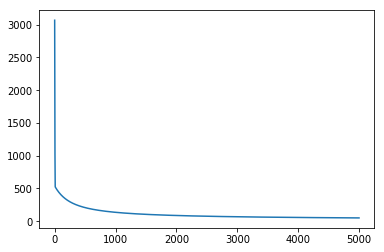

In [83]:
ones=np.array([[1]*N]).T   #or np.ones((N,1)
r=np.zeros((N,1))
for i in range(N):
       
    r[i]=np.sqrt(X[i,:].dot(X[i,:]))    #everypoint calculate x^2+y^2=R^2
    
Xn=np.concatenate((ones,r,X),axis=1)   #feature engineering adding R to X and Y coordinate
w=np.random.randn(D+2)   # R and 1.0 (+2)

z=np.dot(Xn,w)
epsilon=1e-10
iteration=5000
alpha=0.0001    # learning rate
j_cost=[]


def sigmoid(z):
    return 1/(1+np.exp(-z))

def cross_entropy_err(Yp,t):
    
    Err=(-1.0*(t*np.log(Yp+epsilon)+(1.0-t)*np.log(1-Yp+epsilon)))
    return np.sum(Err)

Y_n=sigmoid(np.dot(Xn,w))

for time in range(iteration):

    derivative=np.dot(Xn.T,(T-Y_n))-0.01*w        
    w=w+alpha*derivative                                   
    Y_n=sigmoid(np.dot(Xn,w))
    
    if (time%1==0):
        j_cost.append(cross_entropy_err(Y_n,T))
        #w_mag.append(np.dot(w.T,w))
#   
print('L2 =0.01, final w,time,J',w,time,cross_entropy_err(Y_n,T))
print('Classificatio rate:', 1-np.abs(T-np.round(Y_n)).sum()/N)
plt.plot(j_cost)
#L2 =0.01, final w,time,J [-1.19226702e+01  1.62193622e+00 -6.49867140e-03  1.40754869e-02] 4999 57.73337721239293
#Classificatio rate: 0.99
# w0 big negative bias, w_radius positive, small radius make sigmoid 0, since exp(-1*-11.9 ,,,)
#large radius make #sigmoid postive 1, class 1

In [75]:
np.dot((T-Y_n),Xn)  #array([-7.81487210e+00,  1.02675486e+00,  1.62381335e-03,  5.63485246e-03])

array([-7.81487210e+00,  1.02675486e+00,  1.62381335e-03,  5.63485246e-03])

In [ ]:
np.dot(Xn.T,(T-Y_n))

C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


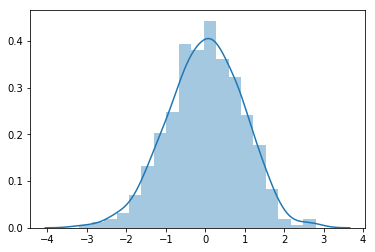

In [67]:
sns.distplot(np.random.randn(int(N/2)))

In [87]:
np.shape(np.array([[1]*N]).T)

(1000, 1)

In [86]:
np.shape(np.ones((N,1)))

(1000, 1)